Import Library

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from math import pi

from scipy import ndimage as nd


Load Image and Change Colour to Gray

In [2]:
# Load image
im_ori = plt.imread('./image/sea_sky.png')
im = cv2.imread('./image/sea_sky.png')

# Remove noise
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Converting to gray scale
img_gaussian = cv2.GaussianBlur(im,(3,3),0)

Image Original and Image Gray

Text(0.5, 1.0, 'Image Gray')

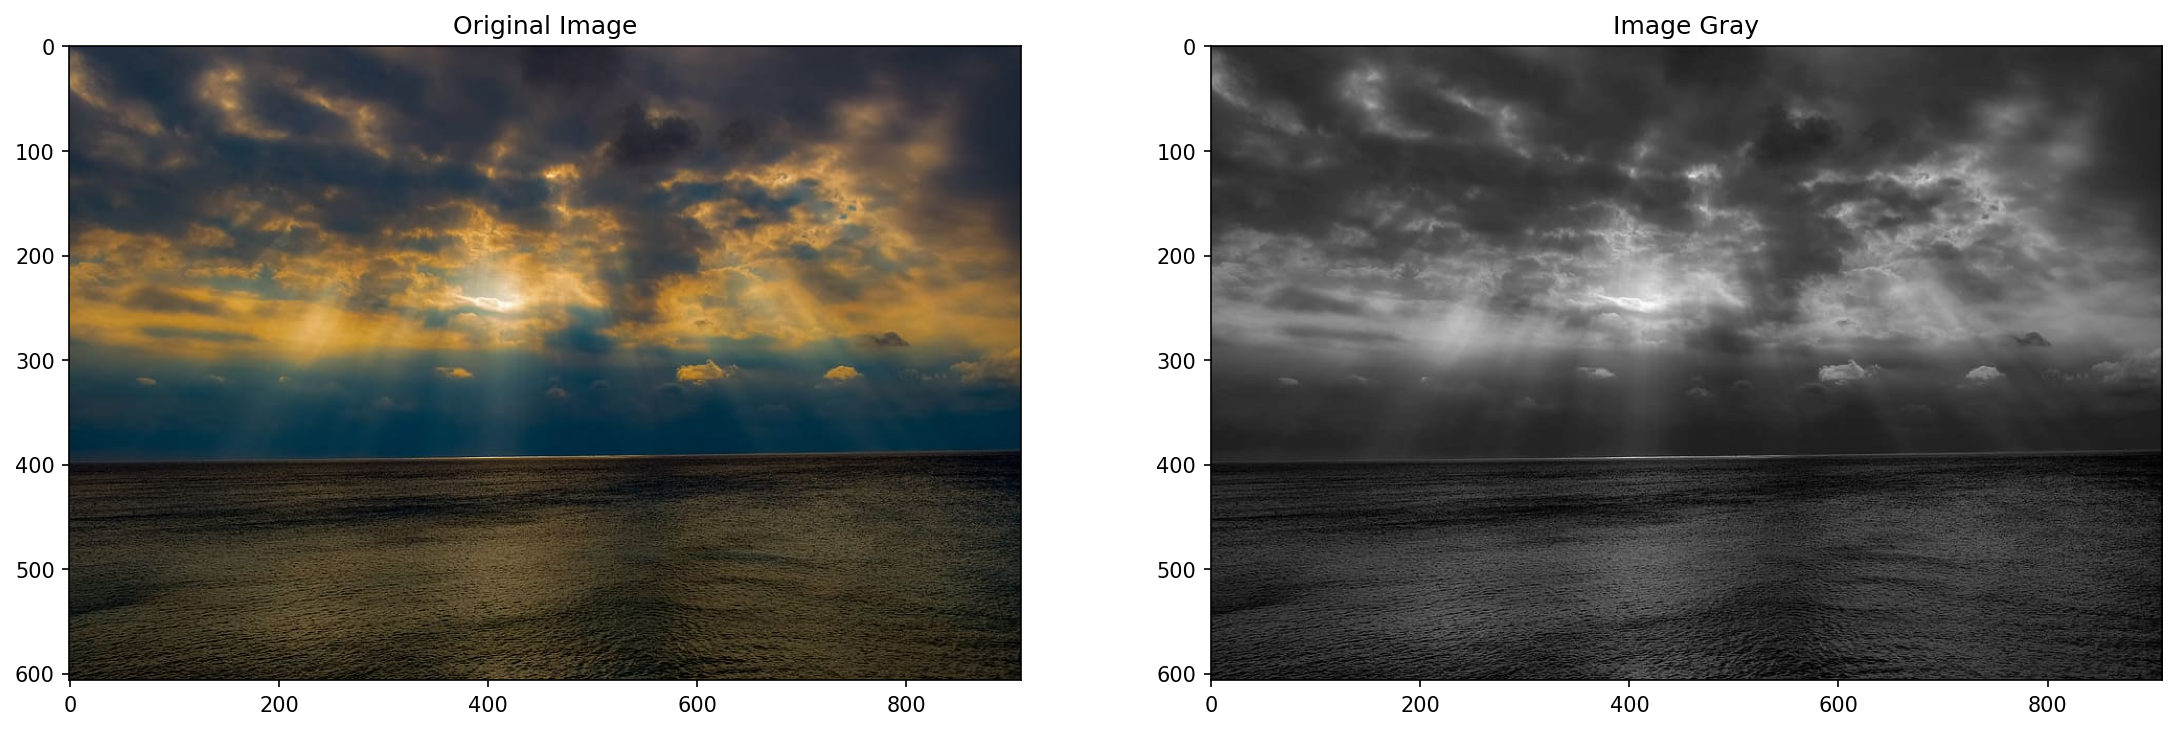

In [3]:
# Plot in image
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)
ax[0].imshow(im_ori)
ax[1].imshow(im, cmap='gray')

# Show image
ax[0].set_title('Original Image')
ax[1].set_title('Image Gray')

Using the Canny Operator

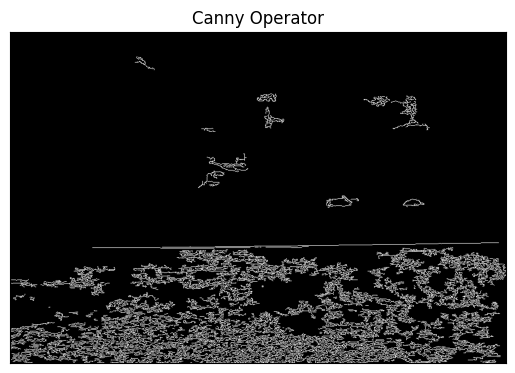

In [4]:
edge_canny = cv2.Canny(im,25,255,L2gradient=False)

plt.title('Canny Operator'), plt.xticks([]), plt.yticks([])
plt.imshow(edge_canny, cmap='gray')

Determining the Value in the Threshold Method

In [5]:
otsu_thresh, _ = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)
triangle_thresh, _ = cv2.threshold(im, 0, 255, cv2.THRESH_TRIANGLE)
manual_thresh = np.median(im)

def get_range(threshold, sigma=0.33):
    return (1-sigma) * threshold, (1+sigma) * threshold

otsu_thresh = get_range(otsu_thresh)
triangle_thresh = get_range(triangle_thresh)
manual_thresh = get_range(manual_thresh)

print(f"Otsu's Threshold: {otsu_thresh} \nTriangle Threshold: {triangle_thresh} \nManual Threshold: {manual_thresh}")

Otsu's Threshold: (57.61999999999999, 114.38000000000001) 
Triangle Threshold: (64.32, 127.68) 
Manual Threshold: (40.199999999999996, 79.80000000000001)


Use of Various Thresholding Methods in Canny Operator

Text(0.5, 1.0, 'Manual Threshould with Canny Operator')

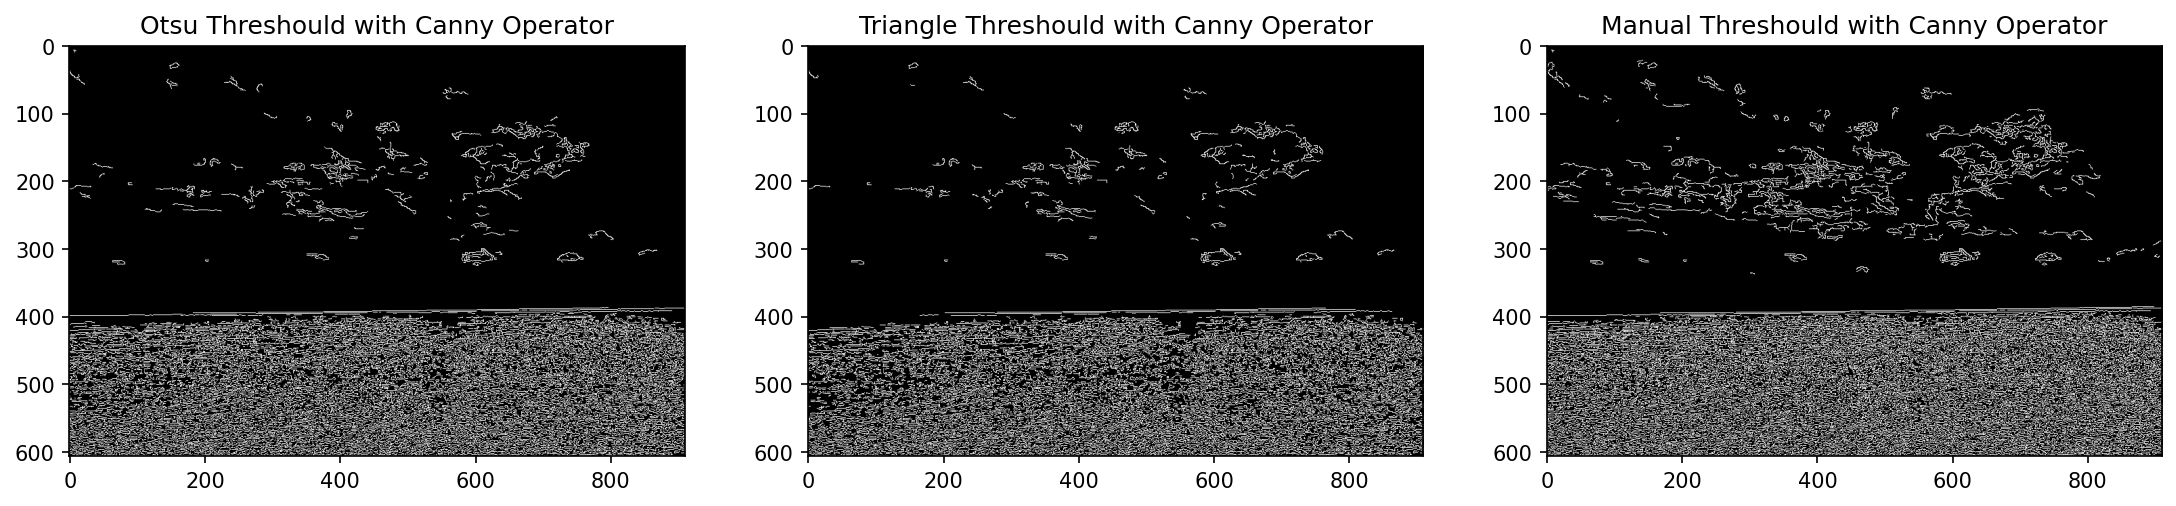

In [6]:
edge_otsu = cv2.Canny(im, *otsu_thresh)
edge_triangle = cv2.Canny(im, *triangle_thresh)
edge_manual = cv2.Canny(im, *manual_thresh)

fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=150)
ax[0].imshow(edge_otsu, cmap='gray')
ax[1].imshow(edge_triangle, cmap='gray')
ax[2].imshow(edge_manual, cmap='gray')

ax[0].set_title('Otsu Threshould with Canny Operator')
ax[1].set_title('Triangle Threshould with Canny Operator')
ax[2].set_title('Manual Threshould with Canny Operator')

Using Sobel Operator

Text(0.5, 1.0, 'Sobel')

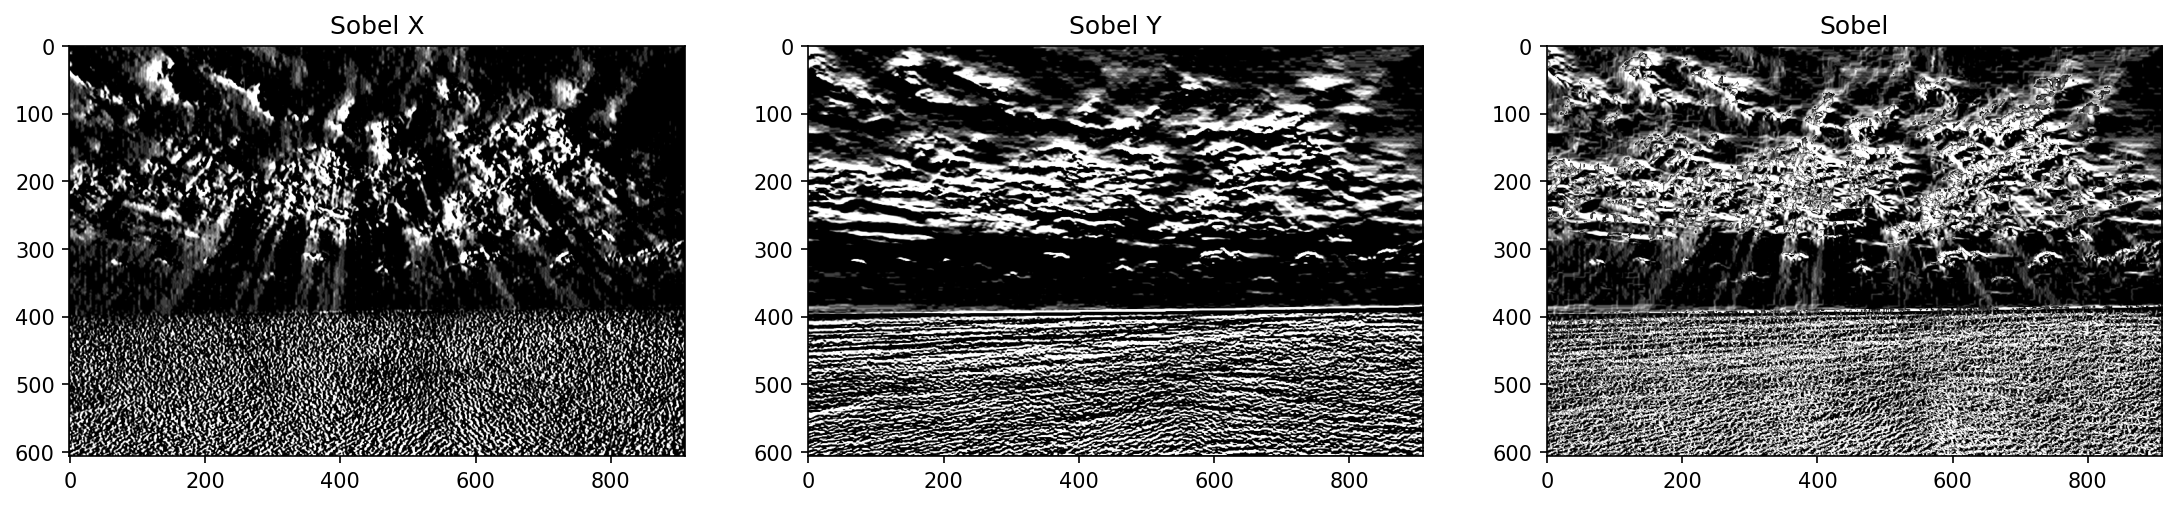

In [7]:
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely

fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=150)
ax[0].imshow(img_sobelx, cmap='gray')
ax[1].imshow(img_sobely, cmap='gray')
ax[2].imshow(img_sobel, cmap='gray')

ax[0].set_title('Sobel X')
ax[1].set_title('Sobel Y')
ax[2].set_title('Sobel')

Prewitt Operator

Text(0.5, 1.0, 'Prewitt')

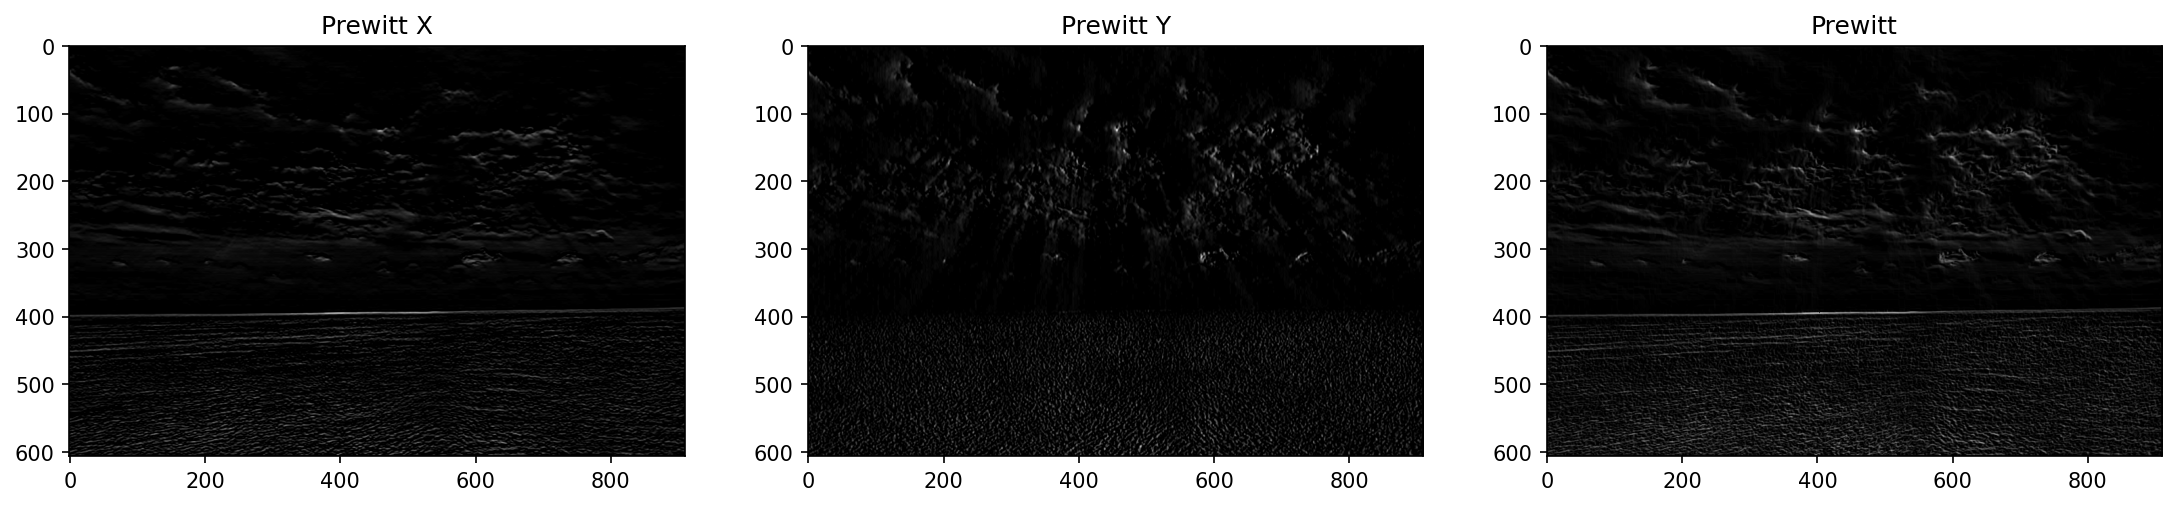

In [8]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=150)
ax[0].imshow(img_prewittx, cmap='gray')
ax[1].imshow(img_prewitty, cmap='gray')
ax[2].imshow(img_prewittx+img_prewitty, cmap='gray')

ax[0].set_title('Prewitt X')
ax[1].set_title('Prewitt Y')
ax[2].set_title('Prewitt')

Robert Operator

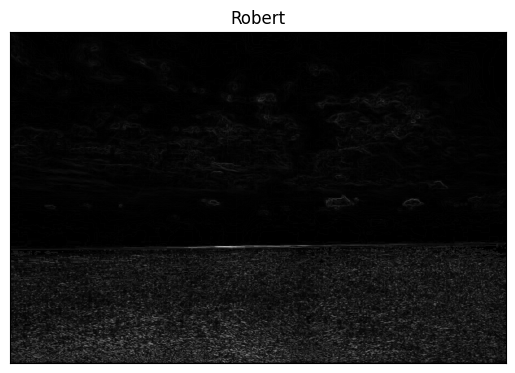

In [9]:
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
im_robert = cv2.imread("./image/sea_sky.png",0).astype('float64')
im_robert/=255.0
vertical = nd.convolve( im_robert, roberts_cross_v )
horizontal = nd.convolve( im_robert, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

plt.title('Robert'), plt.xticks([]), plt.yticks([])

plt.imshow(edged_img, cmap='gray')

Laplacian Operator

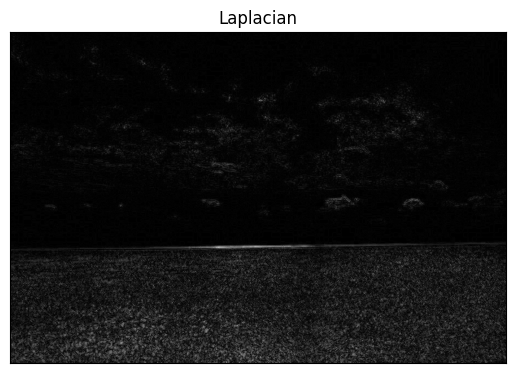

In [10]:
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

dst = cv2.Laplacian(img_gaussian,cv2.CV_16S,ksize=3)
abs_dst = cv2.convertScaleAbs(dst)
plt.imshow(abs_dst, cmap='gray')

Laplacian of Gaussian Operator

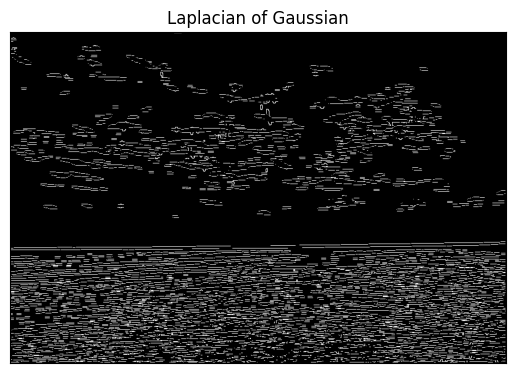

In [11]:
LoG = nd.gaussian_laplace(img_gaussian , 2)
thres = np.absolute(LoG).mean() * 0.75
output = np.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1

plt.title('Laplacian of Gaussian'), plt.xticks([]), plt.yticks([])
plt.imshow(output, cmap='gray')

Compas Operator

In [12]:
e_k = np.zeros_like(img_gaussian) 
s_k = np.zeros_like(img_gaussian)
n_k = np.zeros_like(img_gaussian)
nw_k = np.zeros_like(img_gaussian)
ne_k = np.zeros_like(img_gaussian)
sw_k = np.zeros_like(img_gaussian)
se_k = np.zeros_like(img_gaussian)
w_k = np.zeros_like(img_gaussian)
     
ka= np.array([[-1,-2,-1],[0,0,0],[1,2,1]])                 
na= np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
wa= np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sa= np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
nea= np.array([[-2,-1,0],[-1,0,1],[0,1,2]])
nwa= np.array([[0,1,2],[-1,0,1],[-2,-1,0]])
sea= np.array([[0,-1,-2],[1,0,-1],[2,1,0]])
swa= np.array([[2,1,0],[1,0,-1],[0,-1,-2]])

e_k=nd.convolve(img_gaussian,ka,mode='nearest',cval=0.0)

n_k=nd.convolve(img_gaussian,na,mode='nearest',cval=0.0)
     

s_k=nd.convolve(img_gaussian,sa,mode='nearest',cval=0.0)
     

w_k=nd.convolve(img_gaussian,wa,mode='nearest',cval=0.0)
     

ne_k=nd.convolve(img_gaussian,nea,mode='nearest',cval=0.0)
     

nw_k=nd.convolve(img_gaussian,nwa,mode='nearest',cval=0.0)
     

se_k=nd.convolve(img_gaussian,sea,mode='nearest',cval=0.0)
     

sw_k=nd.convolve(img_gaussian,swa,mode='nearest',cval=0.0)

East

(([], []), ([], []))

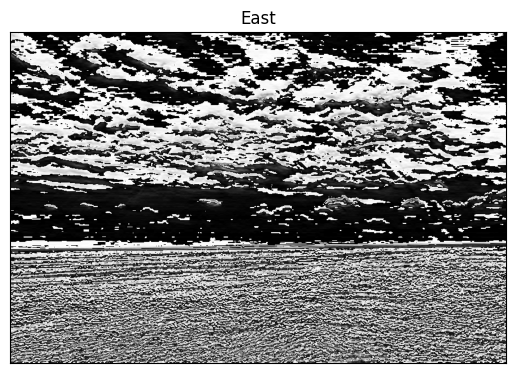

In [13]:
plt.title('East')
plt.imshow(e_k, cmap='gray')
plt.xticks([]),plt.yticks([])

...

North

(([], []), ([], []))

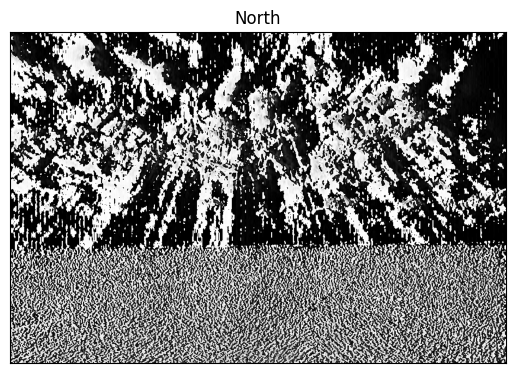

In [14]:
plt.title('North')
plt.imshow(n_k, cmap='gray')
plt.xticks([]),plt.yticks([])

West

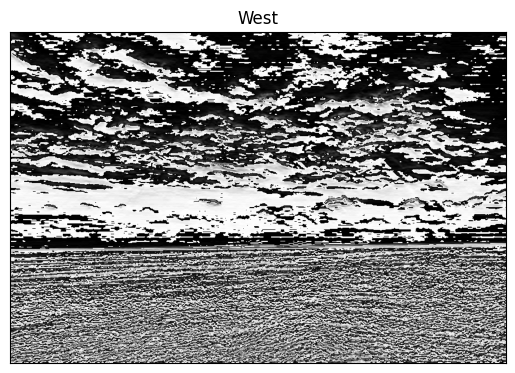

In [15]:
plt.title('West')
plt.imshow(w_k, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

South

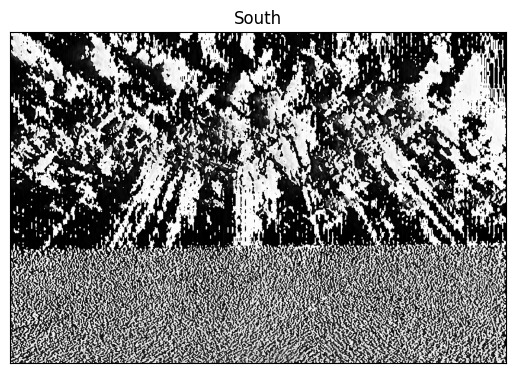

In [16]:
plt.title('South')
plt.imshow(s_k, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

North-East

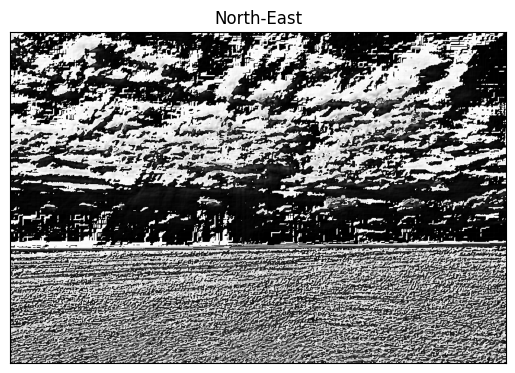

In [17]:
plt.title('North-East')
plt.imshow(ne_k, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

North-West

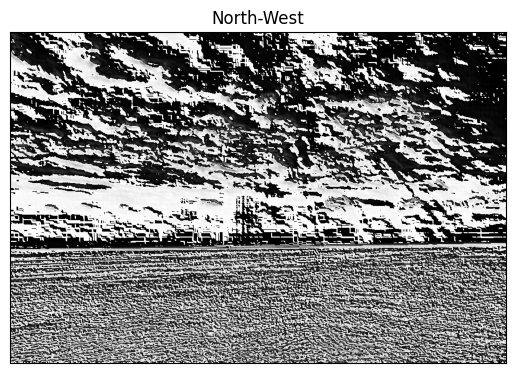

In [18]:
plt.title('North-West')
plt.imshow(nw_k, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

South-East

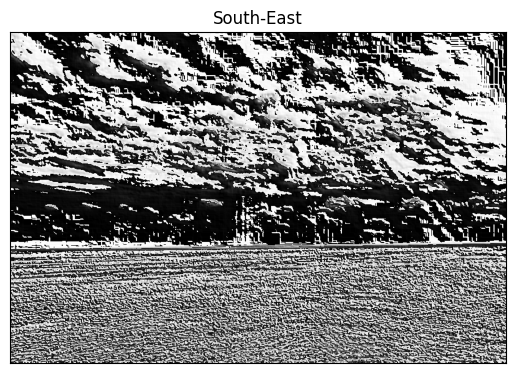

In [19]:
plt.title('South-East')
plt.imshow(se_k, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

South-West

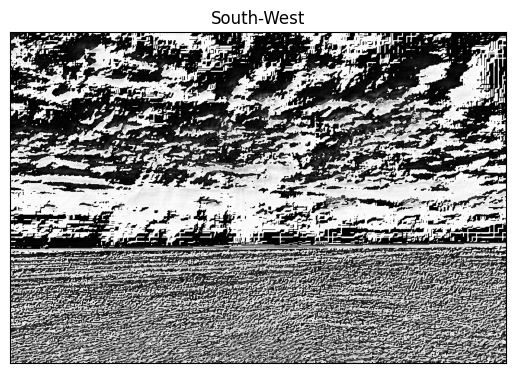

In [20]:
plt.title('South-West')
plt.imshow(sw_k, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()